In [18]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 150)
import seaborn as sns
sns.set_theme(color_codes=True)
from scipy import stats
import statsmodels.api as sm
import numpy as np
import json

## Read the Data

In [165]:
second_session_raw_data = pd.read_csv('Data/second_round_data.csv', index_col=0).reset_index().drop(columns=['index'])
# second_session_raw_data = second_session_raw_data[second_session_raw_data.mturkID != 'nan' ]

num_all_experimenters = len(second_session_raw_data.mturkID.unique())
num_excluded_experimenters = 0

second_session_raw_data.head()

/opt/homebrew/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (64,66) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,run_id,condition,rt,url,focus_screen,trial_type,trial_index,time_elapsed,internal_node_id,hitId,workerId,assignmentId,a,tp_a,b,tp_b,c,tp_c,experiment_id,assignmentID,mturkID,hitID,success,timeout,failed_images,failed_audio,failed_video,stimulus,response,exp_stage,view_history,exp_part,question_order,quiz_score,color,cond,cond_action,cond_outcome,block,side,x_circle,y_circle,choice,correct,curr_bonus,trial_bonus,outcome,feedback_points,prob_fall,expected_feedback,agg_fb_pts,error_block,num_gos,num_nogos,suspicious,exp_final_status,recorded_at,ip,user_agent,device,browser,browser_version,platform,platform_version,source_code_version,suspicious_type
0,10,1,2151099.3000000715,https://raw.githubusercontent.com/Sepsad/Ortho...,focus,external-html,0,2151411,0.0-0.0,3J9UN9O9J4V9Z9ONC1GRIBAY6THJ0Q,A2WPKP73S4MBLK,3KKG4CDWKJ13E5R8ZSHIU4HX8AH94D,W4KK2,W4KK2,3KKG4CDWKJ13E5R8ZSHIU4HX8AH94D,3KKG4CDWKJ13E5R8ZSHIU4HX8AH94D,332332.0,332332.0,GNG_11zz0c8b,3KKG4CDWKJ13E5R8ZSHIU4HX8AH94D,A2WPKP73S4MBLK,3J9UN9O9J4V9Z9ONC1GRIBAY6THJ0Q,"""","""","""","""","""","""","""","""","""","""","""","""","""","""","""","""","""","""","""","""","""",False,"""","""","""","""","""","""","""","""","""","""","""","""",2021-11-26 16:43:35,75.191.84.240,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,WebKit,Chrome,95.0.4638.69,Windows,10.0,e2c51b786386a28786cab1eaf4849cf4,NaN
1,10,1,17349.799999952316,https://raw.githubusercontent.com/Sepsad/Ortho...,"""",external-html,1,2169312,0.0-1.0,3J9UN9O9J4V9Z9ONC1GRIBAY6THJ0Q,A2WPKP73S4MBLK,3KKG4CDWKJ13E5R8ZSHIU4HX8AH94D,W4KK2,W4KK2,3KKG4CDWKJ13E5R8ZSHIU4HX8AH94D,3KKG4CDWKJ13E5R8ZSHIU4HX8AH94D,332332.0,332332.0,GNG_11zz0c8b,3KKG4CDWKJ13E5R8ZSHIU4HX8AH94D,A2WPKP73S4MBLK,3J9UN9O9J4V9Z9ONC1GRIBAY6THJ0Q,"""","""","""","""","""","""","""","""","""","""","""","""","""","""","""","""","""","""","""","""","""",False,"""","""","""","""","""","""","""","""","""","""","""","""",2021-11-26 16:43:35,75.191.84.240,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,WebKit,Chrome,95.0.4638.69,Windows,10.0,e2c51b786386a28786cab1eaf4849cf4,NaN
2,10,1,"""","""","""",preload,2,2170745,0.0-2.0,3J9UN9O9J4V9Z9ONC1GRIBAY6THJ0Q,A2WPKP73S4MBLK,3KKG4CDWKJ13E5R8ZSHIU4HX8AH94D,W4KK2,W4KK2,3KKG4CDWKJ13E5R8ZSHIU4HX8AH94D,3KKG4CDWKJ13E5R8ZSHIU4HX8AH94D,332332.0,332332.0,GNG_11zz0c8b,3KKG4CDWKJ13E5R8ZSHIU4HX8AH94D,A2WPKP73S4MBLK,3J9UN9O9J4V9Z9ONC1GRIBAY6THJ0Q,true,false,[],[],[],"""","""","""","""","""","""","""","""","""","""","""","""","""","""","""","""",False,"""","""","""","""","""","""","""","""","""","""","""","""",2021-11-26 16:43:35,75.191.84.240,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,WebKit,Chrome,95.0.4638.69,Windows,10.0,e2c51b786386a28786cab1eaf4849cf4,NaN
3,10,1,4633.200000047684,"""","""",html-button-response,3,2175379,0.0-3.0,3J9UN9O9J4V9Z9ONC1GRIBAY6THJ0Q,A2WPKP73S4MBLK,3KKG4CDWKJ13E5R8ZSHIU4HX8AH94D,W4KK2,W4KK2,3KKG4CDWKJ13E5R8ZSHIU4HX8AH94D,3KKG4CDWKJ13E5R8ZSHIU4HX8AH94D,332332.0,332332.0,GNG_11zz0c8b,3KKG4CDWKJ13E5R8ZSHIU4HX8AH94D,A2WPKP73S4MBLK,3J9UN9O9J4V9Z9ONC1GRIBAY6THJ0Q,"""","""","""","""","""",<img src='../img/welcome.gif' style='height: 2...,0,first_welcome,"""","""","""","""","""","""","""","""","""","""","""","""","""",False,"""","""","""","""","""","""","""","""","""","""","""","""",2021-11-26 16:43:35,75.191.84.240,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,WebKit,Chrome,95.0.4638.69,Windows,10.0,e2c51b786386a28786cab1eaf4849cf4,NaN
4,10,1,10536.5,"""","""",instructions,4,2185917,0.0-4.0,3J9UN9O9J4V9Z9ONC1GRIBAY6THJ0Q,A2WPKP73S4MBLK,3KKG4CDWKJ13E5R8ZSHIU4HX8AH94D,W4KK2,W4KK2,3KKG4CDWKJ13E5R8ZSHIU4HX8AH94D,3KKG4CDWKJ13E5R8ZSHIU4HX8AH94D,332332.0,332332.0,GNG_11zz0c8b,3KKG4CDWKJ13E5R8ZSHIU4HX8AH94D,A2WPKP73S4MBLK,3J9UN9O9J4V9Z9ONC1GRIBAY6THJ0Q,"""","""","""","""","""","""","""",before_instructions,"[{""page_index"":0,""viewing_time"":2025.399999976...",before_instructions,"""","""","""","""","""","""","""","""","""","""","""",False,"""","""","""","""","""","""","""","""","""","""","""","""",2021-11-26 16:43:3

# Apply exclusion criteria

1. Fail the quiz of instructions more than twice.
2. Change the tab or window of the experiment.

In [167]:
experimenter_status = second_session_raw_data[second_session_raw_data.trial_type == 'survey-html-form'][['run_id','mturkID', 'exp_final_status']]
IDs_for_inclusion_by_completed = experimenter_status[experimenter_status.exp_final_status == 'fully_completed'].mturkID

run_IDs_for_exclusion_by_changing_tabs = second_session_raw_data[second_session_raw_data.exp_final_status == 'not_completed_by_changing_tab'].run_id
run_IDs_for_exclusion_by_failing_quiz = second_session_raw_data[second_session_raw_data.exp_final_status == 'not_completed_by_failing_quiz'].run_id

second_session_clean_data = second_session_raw_data[second_session_raw_data.run_id.isin(run_IDs_for_exclusion_by_changing_tabs) == False]
second_session_clean_data = second_session_clean_data[second_session_clean_data.run_id.isin(run_IDs_for_exclusion_by_failing_quiz) == False]



num_excluded_experimenters = len(second_session_raw_data.mturkID.unique()) - len(second_session_clean_data.mturkID.unique())

print("Number of participants excluded by this criterias:", num_excluded_experimenters)

Number of participants excluded by this criterias: 1


In [179]:
second_session_clean_data.exp_final_status.value_counts()

"                  35482
fully_completed       44
Name: exp_final_status, dtype: int64

3. Respond randomly, always go or never go.

    * Note: We exclude who repond randomly, always go or nogo in each 3 block

In [180]:
second_session_clean_data[second_session_clean_data.suspicious == 'true'][['mturkID', 'suspicious_type','num_gos', 'block']]

,mturkID,suspicious_type,num_gos,block
24793,NaN,error_rate,22,block_2
30453,NaN,all_one,40,block_2
30694,NaN,all_one,40,block_3


In [169]:
IDs_for_exclusion_by_random_response = ['AD1WGUMVD6KED']

num_excluded_experimenters += len(IDs_for_exclusion_by_random_response)

second_session_clean_data = second_session_clean_data[second_session_clean_data.isin(IDs_for_exclusion_by_random_response) == False]

print("Number of participants excluded by this criterias:", len(IDs_for_exclusion_by_random_response))


Number of participants excluded by this criterias: 1


4. Their rate of the correct response to detection of circle side task is less than 55%.

In [181]:
circle_side_correctness = second_session_clean_data[second_session_clean_data.choice == 'go'][['mturkID','side', 'response']]
circle_side_correctness['is_correct_circle_side'] =  (circle_side_correctness.side == circle_side_correctness.response)
accuracy_data = circle_side_correctness.groupby('mturkID').mean().reset_index()
accuracy_data.columns = ['mturkID', 'rate']
accuracy_data['is_below_55'] = accuracy_data.rate < 0.55

accuracy_data.head()


,mturkID,rate,is_below_55
0,A12FTSX85NQ8N9,1.000000,False
1,A1CY7IOJ9YH136,1.000000,False
2,A1DZMZTXWOM9MR,1.000000,False
3,A1FVXS8IM5QYO8,0.588235,False
4,A1MJVTR0PCKBWW,0.966667,False


In [182]:
non_accurate_IDs = accuracy_data[accuracy_data.is_below_55].mturkID

num_excluded_experimenters += len(non_accurate_IDs)

second_session_clean_data = second_session_clean_data[second_session_clean_data.isin(list(non_accurate_IDs)) == False]
print("Number of participants excluded by this criterias:", len(non_accurate_IDs))



Number of participants excluded by this criterias: 0


In [173]:
for i in (non_accurate_IDs):
    print(i)

ACJ6NSCIWMUZI
AQMLJYUQCSG22


In [184]:
second_session_clean_data.mturkID.value_counts()

A24CG5BTB8KQ39    810
A3UDUHUVFKD833    810
A2615YW1YERQBO    810
A1FVXS8IM5QYO8    810
AMHUDJ44HF1ZH     810
A2WPKP73S4MBLK    807
A1CY7IOJ9YH136    807
A3NXT3OVGL7QNR    807
AYW62R027PUT1     807
A2TLN8489YGY81    807
A24Z9RP5YZZ2TY    807
AEQ8K4HBO323D     807
AI4AO0O0WIJF7     807
A26LOVXF4QZZCO    807
A3GVUYY3TWRPZT    807
A2NAKIXS3DVGAA    807
A353XKDTUX10NC    807
A2196WCNDZULFS    807
A1DZMZTXWOM9MR    807
AKNYT1NTK2UFK     807
AKVDK30EEV08C     807
A1MJVTR0PCKBWW    807
A2I960JYUZ8KAV    807
AW5O1RK3W60FC     807
A2ONILC0LZKG6Y    807
A2FYFCD16Z3PCC    807
A1R8A8BK2VN7RH    807
AFRJKS3Z3H4CA     807
A1UDOSYE75OYYI    807
AEOVYZ83Q3GX4     807
A2FGKKWP33DFWS    807
A50K26F2IS94U     807
A1PHDT66U6IK4Q    807
AR8O1107OAW4V     807
A3C59PV8Q2TV8A    807
A3OYUJ6E6BJS4H    807
A12FTSX85NQ8N9    807
A25PFSORDO3SWQ    807
AFM65NU0UXIGP     807
A3CGQOJC28OVGN    807
ARWF605I7RWM7     807
"                   5
A_WORKER_ID         4
Name: mturkID, dtype: int64

# Plot Perforance per conditions

/var/folders/5p/j5wvkpqj2_n5r5h100pdscbr0000gn/T/ipykernel_21390/3639457505.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  circle_task_logs['correct_action'] = (circle_task_logs.choice == circle_task_logs.cond_action)


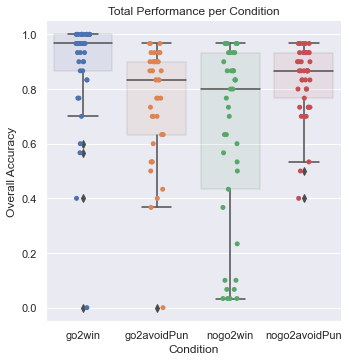

In [186]:
mapping = {'1': 'go2win', '2': 'nogo2win', '3': 'go2avoidPun', '4' : 'nogo2avoidPun'} 

circle_task_logs = second_session_clean_data[second_session_clean_data.exp_stage == 'main_target_detection']

circle_task_logs['correct_action'] = (circle_task_logs.choice == circle_task_logs.cond_action)
performance_per_condition = circle_task_logs.groupby(['mturkID','cond']).mean().reset_index()
performance_per_condition.cond = performance_per_condition.cond.map(mapping)


ax = sns.catplot(x="cond", y="correct", data=performance_per_condition, order= ['go2win','go2avoidPun' ,'nogo2win', 'nogo2avoidPun']);
ax = sns.boxplot(x="cond", y="correct", data= performance_per_condition, boxprops=dict(alpha=.1), order= ['go2win','go2avoidPun' ,'nogo2win', 'nogo2avoidPun']);

ax.set(xlabel="Condition", ylabel = "Overall Accuracy", title = 'Total Performance per Condition')
plt.show()


# Extract Demographic datas

In [222]:
raw_demographic_data = second_session_clean_data[second_session_clean_data.trial_type == 'survey-html-form'][['mturkID', 'response']]
raw_demographic_data['gender'] = raw_demographic_data.response.apply(lambda x: x.split('"')[3])
raw_demographic_data['age'] = raw_demographic_data.response.apply(lambda x: x.split('"')[7])
raw_demographic_data['education_level'] = raw_demographic_data.response.apply(lambda x: x.split('"')[11])
raw_demographic_data['comments'] = raw_demographic_data.response.apply(lambda x: x.split('"')[15])
raw_demographic_data = raw_demographic_data.drop(['response'], axis=1)
raw_demographic_data.head()


,mturkID,gender,age,education_level,comments
806,A2WPKP73S4MBLK,male,30,Bachelor,}
2430,A2I960JYUZ8KAV,male,29,High,}
3237,A2ONILC0LZKG6Y,female,45,Bachelor,}
4044,A2FYFCD16Z3PCC,male,28,Bachelor,}
4851,A1R8A8BK2VN7RH,female,36,Bachelor,}


# Create final data to analyze

In [230]:
final_performace_data = performance_per_condition.pivot(index='mturkID', columns='cond', values='correct').reset_index()


final_performace_data = pd.merge(final_performace_data, accuracy_data, on='mturkID')
final_performace_data = pd.merge(final_performace_data, raw_demographic_data, on='mturkID')
final_performace_data.columns = ['mturkID', 'go2avoidPun_second_session', 'go2win_second_session', 'nogo2avoidPun_second_session', 'nogo2win_second_session', 'circle_side_performance_second_session',\
       'is_below_55_second_session', 'gender_second_session', 'age_second_session', 'education_level_second_session', 'comments_second_session']

final_performace_data.head()

,mturkID,go2avoidPun_second_session,go2win_second_session,nogo2avoidPun_second_session,nogo2win_second_session,circle_side_performance_second_session,is_below_55_second_session,gender_second_session,age_second_session,education_level_second_session,comments_second_session
0,A12FTSX85NQ8N9,0.866667,1.000000,0.966667,0.866667,1.000000,False,male,29,Bachelor,}
1,A1CY7IOJ9YH136,0.833333,0.933333,0.933333,0.966667,1.000000,False,female,52,Bachelor,none
2,A1DZMZTXWOM9MR,0.900000,1.000000,0.966667,0.966667,1.000000,False,male,39,High,none
3,A1FVXS8IM5QYO8,0.366667,0.566667,0.700000,0.366667,0.588235,False,female,55,High,This was really interesting!
4,A1MJVTR0PCKBWW,0.433333,0.900000,0.533333,0.033333,0.966667,False,female,26,Bachelor,"i had no issues, everything worked fine"


In [ ]:
final_performace_data.to_csv('Data/second_round_final_performance.csv')